In [1]:
!pip install -q kaggle
import json

data = {"username":"tunkedsaro","key":"ff3d00dc680ff94caf6f8d4d9bcd3168"}
json_data = json.dumps(data)

# Write the JSON string to a file
file_path = "/content/kaggle.json"
with open(file_path, 'w') as json_file:
    json_file.write(json_data)

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c license-plate-recognition


ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           22MB  2024-06-14 19:10:56             89        341  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           6942        128  1.0              
muhammadroshaanriaz/e-commerce-trends-a-guide-to-leveraging-dataset  Exploring E-commerce Trends⭐️⭐️⭐️                 25KB  2024-06-12 18:07:11           1234         32  1.0              
rabieelkharoua/diabetes-health-dataset-analysis   

In [2]:
!unzip /content/license-plate-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: 1-LPR-950/1-LPR-950/1/License_00647.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00648.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00649.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00650.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00651.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00652.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00653.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00654.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00655.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00656.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00657.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00658.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00659.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00660.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00661.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00662.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00663.jpg  
  inflating: 1

<hr>

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [5]:
test_df = pd.read_csv("/content/test.csv")
test_df

,image_id,x1,y1,x2,y2
0,4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4,333.014354,205.741627,394.497608,238.277512
1,2678e665-50a9-42eb-8b98-3a1323a8950d,293.574297,201.867470,358.634538,235.200803
2,1b3bee82-898d-4aa8-9a7e-6f375ad62d8f,306.425703,204.277108,362.248996,227.168675
3,6d997bce-395e-4d25-85e4-dec70ead7954,332.530120,199.056225,397.991968,228.775100
4,59c765b1-cdac-4fa7-902c-685f1591decf,312.466844,160.477454,378.779841,193.103448
...,...,...,...,...,...
1695,1c766e55-3096-4814-8c23-7cb8facc0e36,326.506024,205.481928,380.321285,237.208835
1696,98e8495a-e51d-494f-951d-739a93d87777,311.962963,201.308642,374.308642,232.790123
1697,935248b8-1fe9-4cc3-8894-007bd715d309,305.790123,204.395062,371.839506,236.493827
1698,df48b54b-8e63-4484-85f1-99a6c97e92f4,328.012346,215.506173,389.740741,247.604938


In [6]:
submit_df = pd.read_csv("/content/submission.csv")
submit_df

,image_id,label
0,4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4,0ฬ-0674
1,2678e665-50a9-42eb-8b98-3a1323a8950d,05กฒ4901
2,1b3bee82-898d-4aa8-9a7e-6f375ad62d8f,1กฉ9661
3,6d997bce-395e-4d25-85e4-dec70ead7954,NaN
4,59c765b1-cdac-4fa7-902c-685f1591decf,NaN
...,...,...
1695,1c766e55-3096-4814-8c23-7cb8facc0e36,NaN
1696,98e8495a-e51d-494f-951d-739a93d87777,NaN
1697,935248b8-1fe9-4cc3-8894-007bd715d309,NaN
1698,df48b54b-8e63-4484-85f1-99a6c97e92f4,NaN


In [7]:
len(os.listdir("/content/test/test"))

1700

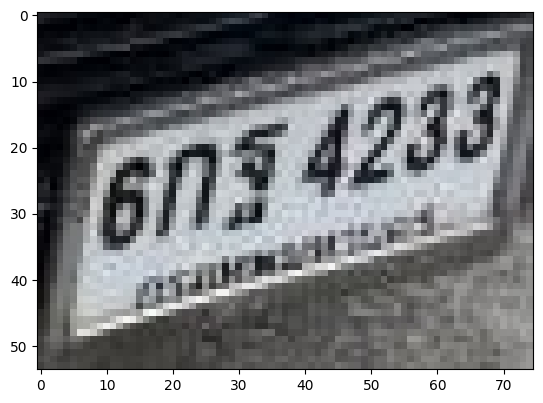

In [8]:
img = plt.imread("/content/1-LPR-950/1-LPR-950/1/License_00002.jpg")
plt.imshow(img)

In [9]:
def txtread(txtpath):
    with open(txtpath) as f:
        lines = f.readlines()
    print(lines)

In [10]:
with open("/content/1-LPR-950/1-LPR-950/1/labels/License_00002.txt") as f:
    lines = f.readlines()
lines

['6 0.16 0.546292 0.133336 0.425925\n',
 '4 0.56 0.39815 0.16 0.35185\n',
 '2 0.666672 0.314817 0.106664 0.370367\n',
 '3 0.773336 0.305558 0.106664 0.314817\n',
 '3 0.873336 0.277775 0.12 0.333333\n',
 '10 0.28 0.490742 0.106664 0.388892\n',
 '25 0.433336 0.4537 0.146664 0.35185\n',
 '54 0.52 0.638892 0.693336 0.240742\n']

In [11]:
def image_w_box(pm1:str,pm2:str):
    """
    pm1 : image path str
    pm2 : yolo labels path str
    """
    # Load the image
    img = plt.imread(pm1)
    print(img.shape)
    # Path to the annotation file
    annotation_img = pm2
    # Read the YOLO annotations from the file
    with open(annotation_img, 'r') as file:
        yolo_annotations = file.readlines()
    # Plot the image
    fig, ax = plt.subplots()
    ax.imshow(img)
    # Function to convert YOLO format to bounding box coordinates
    def yolo_to_bbox(yolo_annotation, img_width, img_height):
        class_label, x_center, y_center, width, height = map(float, yolo_annotation.split())
        x_center *= img_width
        y_center *= img_height
        width *= img_width
        height *= img_height
        x_min = x_center - width / 2
        y_min = y_center - height / 2
        return x_min, y_min, width, height, int(class_label)
    # Get image dimensions
    img_height, img_width = img.shape[:2]

    # Plot each bounding box and label
    for annotation in yolo_annotations:
        x_min, y_min, width, height, class_label = yolo_to_bbox(annotation, img_width, img_height)
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min-5, y_min - 5, str(class_label), color='white', fontsize=12, backgroundcolor='red')

    plt.show()

## ภาพและlabel จาก 1-LPR-950

(51, 142, 3)


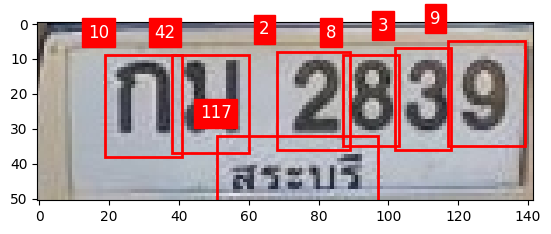

In [12]:
img_path_name = f'/content/1-LPR-950/1-LPR-950/1/License_00003.jpg'
ano_path_name = "/content/1-LPR-950/1-LPR-950/1/labels/License_00003.txt"

image_w_box(img_path_name,ano_path_name)

## ภาพและlabel จาก 2-LPR-950

(56, 107, 3)


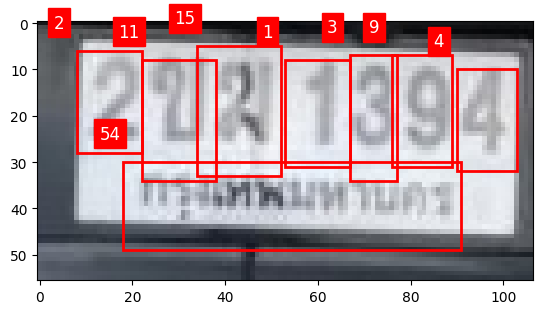

In [13]:
img_path_name = f'/content/2-LRP-950/2-LRP-950/2/License_00951.jpg'
ano_path_name = "/content/2-LRP-950/2-LRP-950/2/labels/License_00951.txt"

image_w_box(img_path_name,ano_path_name)

In [14]:
with open("/content/lp_classes.txt") as f:
    lines = f.readlines()
ipclass = [i.replace("\n","") for i in lines]
ipdict = {}
for idx,i in enumerate(ipclass):
    ipdict[idx] = i

In [15]:
ipdict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'ก',
 11: 'ข',
 12: 'ฃ',
 13: 'ค',
 14: 'ฅ',
 15: 'ฆ',
 16: 'ง',
 17: 'จ',
 18: 'ฉ',
 19: 'ช',
 20: 'ซ',
 21: 'ฌ',
 22: 'ญ',
 23: 'ฎ',
 24: 'ฏ',
 25: 'ฐ',
 26: 'ฑ',
 27: 'ฒ',
 28: 'ณ',
 29: 'ด',
 30: 'ต',
 31: 'ถ',
 32: 'ท',
 33: 'ธ',
 34: 'น',
 35: 'บ',
 36: 'ป',
 37: 'ผ',
 38: 'ฝ',
 39: 'พ',
 40: 'ฟ',
 41: 'ภ',
 42: 'ม',
 43: 'ย',
 44: 'ร',
 45: 'ล',
 46: 'ว',
 47: 'ศ',
 48: 'ษ',
 49: 'ส',
 50: 'ห',
 51: 'ฬ',
 52: 'อ',
 53: 'ฮ',
 54: 'กรุงเทพมหานคร',
 55: 'กระบี่',
 56: 'กาญจนบุรี',
 57: 'กาฬสินธุ์',
 58: 'กำแพงเพชร',
 59: 'ขอนแก่น',
 60: 'จันทบุรี',
 61: 'ฉะเชิงเทรา',
 62: 'ชลบุรี',
 63: 'ชัยนาท',
 64: 'ชัยภูมิ',
 65: 'ชุมพร',
 66: 'เชียงราย',
 67: 'เชียงใหม่',
 68: 'ตรัง',
 69: 'ตราด',
 70: 'ตาก',
 71: 'นครนายก',
 72: 'นครปฐม',
 73: 'นครพนม',
 74: 'นครราชสีมา',
 75: 'นครศรีธรรมราช',
 76: 'นครสวรรค์',
 77: 'นนทบุรี',
 78: 'นราธิวาส',
 79: 'น่าน',
 80: 'บึงกาฬ',
 81: 'บุรีรัมย์',
 82: 'ปทุม

# test data

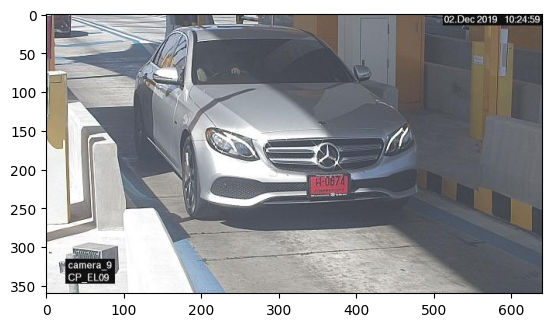

In [16]:
img = plt.imread("/content/test/test/4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4.jpg")
plt.imshow(img)

In [17]:
test_df.iloc[0].values[0]

'4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4'

In [18]:
img_name = test_df.iloc[0].values[0]
x1 = int(test_df.iloc[0].values[1])
y1 = int(test_df.iloc[0].values[2])
x2 = int(test_df.iloc[0].values[3])
y2 = int(test_df.iloc[0].values[4])
print(f"{img_name} {x1} {y1} {x2} {y2}")

4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4 333 205 394 238


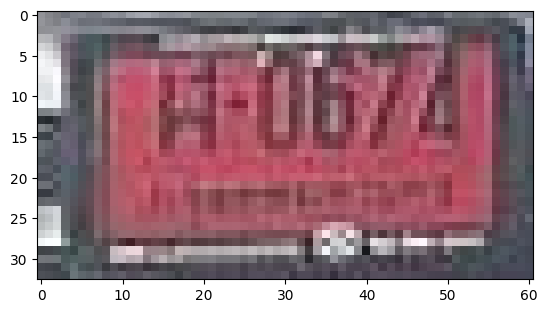

In [19]:
# /content/test/test/0008f18b-bbde-4cc5-92a3-b8a340484eab.jpg
# "/content/test/test/"+img_name+'.jpg'
img = plt.imread("/content/test/test/"+img_name+'.jpg')
plt.imshow(img[y1:y2,x1:x2])


<hr>

In [68]:
# 01 สร้าง Folder ขึ้นมาใหม่
# YOLOData
# |-images
#   |-image
#   |-label
# |-Train
#   |-image
#   |-label
# |-Val
#   |-image
#   |-label
# |-Data.yaml
# 02 สร้าง df ของชื่อจาก 1-LPR-950 + 2-LPR-950 เพื่อ train test split
# 03 เอาไฟล์จาก 1-LPR-950 -> YOLOData
#              2-LPR-950 -> YOLOData
# 04 Train -> Model
# 05 เรียกภาพออกมา Predict เรื่อยๆจาก text.csv

In [20]:
import os

# Define the folder structure
folder_structure = {
    "YOLOData": {
        "simages": {
            "images": {},
            "labels": {}
        },
        "result": {},
        "train": {
            "images": {},
            "labels": {},
        },
        "val": {
            "images": {},
            "labels": {},
        },
    }
}

def create_folders(base_path, structure):
    for name, substructure in structure.items():
        folder_path = os.path.join(base_path, name)
        if substructure is None:
            # If substructure is None, create a file
            open(folder_path, 'a').close()
        else:
            # Otherwise, create a directory and recurse
            os.makedirs(folder_path, exist_ok=True)
            create_folders(folder_path, substructure)

# Create the folder structure in Colab
base_path = "/content"
create_folders(base_path, folder_structure)

print("Folder structure created successfully!")

Folder structure created successfully!


In [21]:
import shutil

In [22]:
# copy label file -> simages
labelpath1 = "/content/1-LPR-950/1-LPR-950/1/labels"
for i in os.listdir(labelpath1):
    labelname = labelpath1+'/'+i
    print(labelname)
    shutil.copy(labelname,"/content/YOLOData/simages/labels")
    # break
labelpath2 = "/content/2-LRP-950/2-LRP-950/2/labels"
for i in os.listdir(labelpath2):
    labelname = labelpath2+'/'+i
    print(labelname)
    shutil.copy(labelname,"/content/YOLOData/simages/labels")
    # break

/content/1-LPR-950/1-LPR-950/1/labels/License_00148.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00891.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00223.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00787.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00429.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00613.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00640.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00318.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00411.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00868.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00249.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00782.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00156.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00883.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00033.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00685.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00032.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00

In [23]:
imgpath1 = "/content/1-LPR-950/1-LPR-950/1"
for i in os.listdir(imgpath1):
    imgname = imgpath1 + '/' + i
    if os.path.isdir(imgname): # if is dir
        continue
    else:
        # print(imgpath1+'/'+i)
        shutil.copy(imgname,"/content/YOLOData/simages/images")
    # break
imgpath2 = "/content/2-LRP-950/2-LRP-950/2"
for i in os.listdir(imgpath2):
    imgname = imgpath2 + '/' + i
    if os.path.isdir(imgname): # if is dir
        continue
    else:
        # print(imgpath2+'/'+i)
        shutil.copy(imgname,"/content/YOLOData/simages/images")
    # break

<hr>

In [24]:
imgpd = os.listdir("/content/YOLOData/simages/images")
imgpd

['License_01977.jpg',
 'License_01567.jpg',
 'License_00515.jpg',
 'License_01255.jpg',
 'License_00988.jpg',
 'License_01176.jpg',
 'License_00326.jpg',
 'License_00217.jpg',
 'License_00348.jpg',
 'License_01441.jpg',
 'License_00008.jpg',
 'License_01762.jpg',
 'License_01010.jpg',
 'License_01769.jpg',
 'License_01090.jpg',
 'License_01282.jpg',
 'License_01277.jpg',
 'License_00784.jpg',
 'License_01740.jpg',
 'License_00474.jpg',
 'License_01420.jpg',
 'License_01596.jpg',
 'License_01802.jpg',
 'License_01681.jpg',
 'License_01509.jpg',
 'License_00141.jpg',
 'License_00191.jpg',
 'License_00322.jpg',
 'License_00270.jpg',
 'License_01864.jpg',
 'License_01803.jpg',
 'License_01974.jpg',
 'License_01069.jpg',
 'License_01928.jpg',
 'License_00787.jpg',
 'License_01299.jpg',
 'License_00967.jpg',
 'License_00651.jpg',
 'License_01106.jpg',
 'License_01553.jpg',
 'License_00183.jpg',
 'License_00750.jpg',
 'License_00844.jpg',
 'License_01469.jpg',
 'License_01225.jpg',
 'License_

In [25]:
df = pd.DataFrame(imgpd, columns=['column_name'])
df

,column_name
0,License_01977.jpg
1,License_01567.jpg
2,License_00515.jpg
3,License_01255.jpg
4,License_00988.jpg
...,...
1966,License_01126.jpg
1967,License_01174.jpg
1968,License_01338.jpg
1969,License_01836.jpg


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Split the DataFrame into train and validation sets
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)


# Print the sizes of the split datasets
print(f"Training set size: {train_df.shape[0]}")
print(f"Validation set size: {val_df.shape[0]}")

Training set size: 1773
Validation set size: 198


In [28]:
# /content/YOLOData/simages/images/License_00001.jpg
# /content/YOLOData/simages/labels/License_00001.txt
for i in list(train_df['column_name']):
    idname = i.split(".")[0]
    imgpath = "/content/YOLOData/simages/images/"+idname+'.jpg'
    nonpath = "/content/YOLOData/simages/labels/"+idname+'.txt'
    print(imgpath,nonpath)
    try:
        shutil.copy(imgpath,"/content/YOLOData/train/images")
        shutil.copy(nonpath,"/content/YOLOData/train/labels")
    except:
        continue
    # break

for i in list(val_df['column_name']):
    idname = i.split(".")[0]
    imgpath = "/content/YOLOData/simages/images/"+idname+'.jpg'
    nonpath = "/content/YOLOData/simages/labels/"+idname+'.txt'
    print(imgpath,nonpath)
    try:
        shutil.copy(imgpath,"/content/YOLOData/val/images")
        shutil.copy(nonpath,"/content/YOLOData/val/labels")
    except:
        continue
    # break

/content/YOLOData/simages/images/License_01150.jpg /content/YOLOData/simages/labels/License_01150.txt
/content/YOLOData/simages/images/License_01078.jpg /content/YOLOData/simages/labels/License_01078.txt
/content/YOLOData/simages/images/License_01782.jpg /content/YOLOData/simages/labels/License_01782.txt
/content/YOLOData/simages/images/License_01520.jpg /content/YOLOData/simages/labels/License_01520.txt
/content/YOLOData/simages/images/License_00832.jpg /content/YOLOData/simages/labels/License_00832.txt
/content/YOLOData/simages/images/License_01856.jpg /content/YOLOData/simages/labels/License_01856.txt
/content/YOLOData/simages/images/License_01103.jpg /content/YOLOData/simages/labels/License_01103.txt
/content/YOLOData/simages/images/License_00123.jpg /content/YOLOData/simages/labels/License_00123.txt
/content/YOLOData/simages/images/License_01968.jpg /content/YOLOData/simages/labels/License_01968.txt
/content/YOLOData/simages/images/License_00822.jpg /content/YOLOData/simages/label

In [29]:
print(len(os.listdir("/content/YOLOData/train/images")))
print(len(os.listdir("/content/YOLOData/train/labels")))

1773
1758


In [30]:
print(len(os.listdir("/content/YOLOData/val/images")))
print(len(os.listdir("/content/YOLOData/val/labels")))

198
193


<hr>

# YOLO

In [31]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [9]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 55.4 MB/s eta 0:00:00


In [33]:
!mkdir -p {HOME}/weights
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 100M
-rw-r--r-- 1 root root 100M May 26 15:53 yolov10l.pt


In [34]:
with open("/content/lp_classes.txt") as f:
    lines = f.readlines()
ipclass = [i.replace("\n","") for i in lines]
# ipdict = {}
# for idx,i in enumerate(ipclass):
#     ipdict[idx] = i
ipclass

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'ก',
 'ข',
 'ฃ',
 'ค',
 'ฅ',
 'ฆ',
 'ง',
 'จ',
 'ฉ',
 'ช',
 'ซ',
 'ฌ',
 'ญ',
 'ฎ',
 'ฏ',
 'ฐ',
 'ฑ',
 'ฒ',
 'ณ',
 'ด',
 'ต',
 'ถ',
 'ท',
 'ธ',
 'น',
 'บ',
 'ป',
 'ผ',
 'ฝ',
 'พ',
 'ฟ',
 'ภ',
 'ม',
 'ย',
 'ร',
 'ล',
 'ว',
 'ศ',
 'ษ',
 'ส',
 'ห',
 'ฬ',
 'อ',
 'ฮ',
 'กรุงเทพมหานคร',
 'กระบี่',
 'กาญจนบุรี',
 'กาฬสินธุ์',
 'กำแพงเพชร',
 'ขอนแก่น',
 'จันทบุรี',
 'ฉะเชิงเทรา',
 'ชลบุรี',
 'ชัยนาท',
 'ชัยภูมิ',
 'ชุมพร',
 'เชียงราย',
 'เชียงใหม่',
 'ตรัง',
 'ตราด',
 'ตาก',
 'นครนายก',
 'นครปฐม',
 'นครพนม',
 'นครราชสีมา',
 'นครศรีธรรมราช',
 'นครสวรรค์',
 'นนทบุรี',
 'นราธิวาส',
 'น่าน',
 'บึงกาฬ',
 'บุรีรัมย์',
 'ปทุมธานี',
 'ประจวบคีรีขันธ์',
 'ปราจีนบุรี',
 'ปัตตานี',
 'พระนครศรีอยุธยา',
 'พังงา',
 'พัทลุง',
 'พิจิตร',
 'พิษณุโลก',
 'เพชรบุรี',
 'เพชรบูรณ์',
 'แพร่',
 'พะเยา',
 'ภูเก็ต',
 'มหาสารคาม',
 'มุกดาหาร',
 'แม่ฮ่องสอน',
 'ยะลา',
 'ยโสธร',
 'ร้อยเอ็ด',
 'ระนอง',
 'ระยอง',
 'ราชบุรี',
 'ลพบุรี',
 'ลำปาง',
 'ลำพูน',
 'เลย',
 

In [35]:
print(len(ipclass))

131


In [ ]:
# train: /content/YOLOData/train/images
# val: /content/YOLOData/val/images

# nc: 131
# names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'ก', 'ข', 'ฃ', 'ค', 'ฅ', 'ฆ', 'ง', 'จ', 'ฉ', 'ช', 'ซ', 'ฌ', 'ญ', 'ฎ', 'ฏ', 'ฐ', 'ฑ', 'ฒ', 'ณ', 'ด', 'ต', 'ถ', 'ท', 'ธ', 'น', 'บ', 'ป', 'ผ', 'ฝ', 'พ', 'ฟ', 'ภ', 'ม', 'ย', 'ร', 'ล', 'ว', 'ศ', 'ษ', 'ส', 'ห', 'ฬ', 'อ', 'ฮ', 'กรุงเทพมหานคร', 'กระบี่', 'กาญจนบุรี', 'กาฬสินธุ์', 'กำแพงเพชร', 'ขอนแก่น', 'จันทบุรี', 'ฉะเชิงเทรา', 'ชลบุรี', 'ชัยนาท', 'ชัยภูมิ', 'ชุมพร', 'เชียงราย', 'เชียงใหม่', 'ตรัง', 'ตราด', 'ตาก', 'นครนายก', 'นครปฐม', 'นครพนม', 'นครราชสีมา', 'นครศรีธรรมราช', 'นครสวรรค์', 'นนทบุรี', 'นราธิวาส', 'น่าน', 'บึงกาฬ', 'บุรีรัมย์', 'ปทุมธานี', 'ประจวบคีรีขันธ์', 'ปราจีนบุรี', 'ปัตตานี', 'พระนครศรีอยุธยา', 'พังงา', 'พัทลุง', 'พิจิตร', 'พิษณุโลก', 'เพชรบุรี', 'เพชรบูรณ์', 'แพร่', 'พะเยา', 'ภูเก็ต', 'มหาสารคาม', 'มุกดาหาร', 'แม่ฮ่องสอน', 'ยะลา', 'ยโสธร', 'ร้อยเอ็ด', 'ระนอง', 'ระยอง', 'ราชบุรี', 'ลพบุรี', 'ลำปาง', 'ลำพูน', 'เลย', 'ศรีสะเกษ', 'สกลนคร', 'สงขลา', 'สตูล', 'สมุทรปราการ', 'สมุทรสงคราม', 'สมุทรสาคร', 'สระแก้ว', 'สระบุรี', 'สิงห์บุรี', 'สุโขทัย', 'สุพรรณบุรี', 'สุราษฎร์ธานี', 'สุรินทร์', 'หนองคาย', 'หนองบัวลำภู', 'อ่างทอง', 'อุดรธานี', 'อุทัยธานี', 'อุตรดิตถ์', 'อุบลราชธานี', 'อำนาจเจริญ']

# degrees: 0.15  # image rotation (+/- deg)
# translate: 0.1  # image translation (+/- fraction)
# scale: 0.2  # image scale (+/- gain)
# shear: 0.2  # image shear (+/- deg) from -0.5 to 0.5
# perspective: 0.1  # image perspective (+/- fraction), range 0-0.001
# flipud: 0.5  # image flip up-down (probability)
# fliplr: 0.5  # image flip left-right (probability)
# mosaic: 0.3  # image mosaic (probability)
# mixup: 0.1  # image mixup (probability)

In [36]:
# Set the paths
data_path = "/content/YOLOData/data.yaml"      # เขียนเฉพาะ ไฟล์ที่มี image, labels ไม่ครบไม่ต้องใส่
model_path = "/content/weights/yolov10l.pt"
save_dir = "/content/YOLOData/result"

In [10]:
from ultralytics import YOLOv10

In [38]:
model = YOLOv10(model_path)

In [39]:
model.train(
    data=data_path,
    epochs=20, # 50
    batch=16,  # A100 32 ได้
    save_dir=save_dir
)

New https://pypi.org/project/ultralytics/8.2.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10l.pt, data=/content/YOLOData/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retin

100%|██████████| 22.2M/22.2M [00:00<00:00, 181MB/s]


Overriding model.yaml nc=80 with nc=131

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1    137728  ultralytics.nn.modules.block.SCDown          [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1    268800  ultralyti

100%|██████████| 6.23M/6.23M [00:00<00:00, 76.5MB/s]


AMP: checks passed ✅


train: Scanning /content/YOLOData/train/labels... 1758 images, 15 backgrounds, 21 corrupt: 100%|██████████| 1773/1773 [00:01<00:00, 1362.68it/s]

train: WARNING ⚠️ /content/YOLOData/train/images/License_00072.jpg: ignoring corrupt image/label: negative label values [    -2.8782     -8.5111     -3.2115     -9.0222     -3.0705     -9.0667      -2.891     -9.0556     -2.4231     -8.9556     -2.7308     -8.9778     -2.5769     -8.9889]
train: WARNING ⚠️ /content/YOLOData/train/images/License_00076.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.5941      7.1875      3.2588      6.9688      3.4294      6.9609      3.5765      6.9375      3.9353      6.9531         3.7      6.9766      3.8059      6.9609]
train: WARNING ⚠️ /content/YOLOData/train/images/License_00085.jpg: ignoring corrupt image/label: negative label values [    -6.0351     -6.3772     -6.3772     -6.3947     -6.3947     -6.3772     -6.4035]
train: WARNING ⚠️ /content/YOLOData/train/images/License_00088.jpg: ignoring corrupt image/label: negative label values [      -5.75     -6.1083     -6.0667     -6.0917     -6.0917        -6.1

train: New cache created: /content/YOLOData/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/YOLOData/val/labels... 193 images, 5 backgrounds, 2 corrupt: 100%|██████████| 198/198 [00:00<00:00, 1065.55it/s]

val: WARNING ⚠️ /content/YOLOData/val/images/License_00084.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      7.663      7.8478      8.1087      8.1087        8.25      8.3804]
val: WARNING ⚠️ /content/YOLOData/val/images/License_00352.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.9767      8.2326      4.3256      8.2209       5.093      8.2093      5.3837       8.186      4.8023      8.6744      1.6512]


val: New cache created: /content/YOLOData/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=7.4e-05, momentum=0.9) with parameter groups 167 weight(decay=0.0), 180 weight(decay=0.0005), 179 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/20      15.1G      2.968      5.818      3.214      2.591      7.087      2.846        268        640:   3%|▎         | 3/110 [00:01<00:54,  1.96it/s]

       1/20      15.1G      2.926      5.819      3.148      2.593      7.064      2.803        243        640:   5%|▌         | 6/110 [00:02<00:33,  3.12it/s]
100%|██████████| 755k/755k [00:00<00:00, 15.3MB/s]
       1/20      15.2G      2.103      3.752       2.22        1.9       4.96      2.023         98        640: 100%|██████████| 110/110 [00:33<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]


                   all        196       1398      0.816      0.101      0.104     0.0456

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       2/20      15.3G      1.876      1.465      1.938       1.79      2.409      1.868        111        640: 100%|██████████| 110/110 [00:25<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.09it/s]

                   all        196       1398      0.687      0.314      0.328      0.148



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       3/20      15.7G      1.825       1.16      1.886      1.789      1.732      1.872        153        640: 100%|██████████| 110/110 [00:24<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.12it/s]

                   all        196       1398      0.698      0.439      0.478      0.226



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       4/20      15.4G      1.791       1.06      1.865       1.77      1.451      1.868        121        640: 100%|██████████| 110/110 [00:24<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.97it/s]

                   all        196       1398       0.77      0.538      0.569      0.274



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       5/20      15.4G      1.757      0.986       1.83      1.745      1.286      1.839        134        640: 100%|██████████| 110/110 [00:24<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.14it/s]

                   all        196       1398      0.788      0.529      0.569      0.276



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       6/20      15.4G      1.746     0.9509      1.838      1.744      1.201      1.838        121        640: 100%|██████████| 110/110 [00:24<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.19it/s]

                   all        196       1398      0.858       0.55      0.604      0.289



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       7/20      15.4G      1.722     0.9023      1.806       1.72      1.119      1.813        108        640: 100%|██████████| 110/110 [00:24<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.16it/s]

                   all        196       1398       0.85      0.537      0.624      0.293



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       8/20      15.4G       1.72     0.8629      1.813      1.728      1.043      1.822        110        640: 100%|██████████| 110/110 [00:24<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.14it/s]

                   all        196       1398      0.815       0.62      0.668      0.319



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       9/20      15.4G      1.718     0.8546      1.797      1.722      1.015      1.804        144        640: 100%|██████████| 110/110 [00:24<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.17it/s]

                   all        196       1398      0.778      0.613       0.67      0.324



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      10/20      15.4G      1.696     0.8326      1.777      1.698     0.9876      1.782         71        640: 100%|██████████| 110/110 [00:24<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.17it/s]

                   all        196       1398      0.811      0.598      0.663      0.327


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      11/20      15.4G      1.742     0.6722      1.891      1.755     0.7631      1.918         57        640: 100%|██████████| 110/110 [00:26<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.06it/s]

                   all        196       1398      0.755      0.644      0.685      0.335



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      12/20      15.4G      1.717       0.65       1.88      1.731      0.717      1.907         55        640: 100%|██████████| 110/110 [00:23<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.19it/s]

                   all        196       1398      0.847      0.609       0.69       0.34



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      13/20      15.4G      1.707     0.6344      1.889      1.724      0.683      1.913         63        640: 100%|██████████| 110/110 [00:24<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.11it/s]

                   all        196       1398      0.788      0.668      0.692      0.331



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      14/20      15.4G      1.685     0.6051      1.849      1.699     0.6406      1.871         58        640: 100%|██████████| 110/110 [00:24<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.87it/s]

                   all        196       1398      0.754      0.653       0.69      0.339



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      15/20      15.4G      1.665     0.5959      1.843      1.682     0.6261       1.87         54        640: 100%|██████████| 110/110 [00:24<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.10it/s]

                   all        196       1398      0.804      0.667      0.705      0.333



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      16/20      15.4G      1.638     0.5735      1.815      1.654     0.5981      1.841         61        640: 100%|██████████| 110/110 [00:23<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.98it/s]

                   all        196       1398      0.847      0.637      0.685      0.332



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      17/20      15.4G      1.624     0.5631      1.814      1.639     0.5905      1.837         59        640: 100%|██████████| 110/110 [00:23<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.13it/s]

                   all        196       1398       0.79      0.685      0.708      0.351



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      18/20      15.4G      1.592     0.5479      1.799      1.604      0.571      1.823         57        640: 100%|██████████| 110/110 [00:24<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.89it/s]


                   all        196       1398      0.791      0.665      0.704      0.336

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      19/20      15.4G      1.562     0.5377      1.782      1.576     0.5572      1.806         57        640: 100%|██████████| 110/110 [00:24<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.18it/s]

                   all        196       1398      0.805       0.66      0.697      0.331



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      20/20      15.4G      1.542     0.5272      1.762      1.555     0.5443      1.784         59        640: 100%|██████████| 110/110 [00:24<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.00it/s]

                   all        196       1398      0.797      0.678      0.713      0.347



20 epochs completed in 0.208 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv10l summary (fused): 461 layers, 25918370 parameters, 0 gradients, 127.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]


                   all        196       1398      0.789      0.684        0.7      0.345
                     0        196         42      0.833          1      0.991       0.44
                     1        196         84      0.836      0.893      0.869      0.336
                     2        196        100      0.916       0.99      0.963      0.455
                     3        196         86      0.866      0.974      0.948       0.43
                     4        196         87      0.838      0.931      0.918      0.427
                     5        196         81      0.865      0.926      0.953      0.437
                     6        196         78      0.865      0.974      0.967      0.453
                     7        196         93      0.858      0.957      0.924      0.423
                     8        196         94      0.885      0.968      0.923      0.416
                     9        196         85      0.869      0.953      0.949       0.45
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  57,  61,  62,  72,  74,  77,  83,  84,  92,  95,
       103, 104, 113, 114, 120, 121, 126])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f93f82093c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    

In [3]:
#Mapping Google Drive to your Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
# !cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/imagecarlabeldetection

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

# Predictor

In [4]:
import pandas as pd
import time

In [5]:
submission_csv_path = "/content/submission.csv"
test_img_path       = "/content/test/test"

model_path          = "/content/drive/MyDrive/imagecarlabeldetection/best.pt"
version             = "0.0.2"

In [6]:
df = pd.read_csv(submission_csv_path)
df

,image_id,label
0,4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4,0ฬ-0674
1,2678e665-50a9-42eb-8b98-3a1323a8950d,05กฒ4901
2,1b3bee82-898d-4aa8-9a7e-6f375ad62d8f,1กฉ9661
3,6d997bce-395e-4d25-85e4-dec70ead7954,NaN
4,59c765b1-cdac-4fa7-902c-685f1591decf,NaN
...,...,...
1695,1c766e55-3096-4814-8c23-7cb8facc0e36,NaN
1696,98e8495a-e51d-494f-951d-739a93d87777,NaN
1697,935248b8-1fe9-4cc3-8894-007bd715d309,NaN
1698,df48b54b-8e63-4484-85f1-99a6c97e92f4,NaN


In [11]:
model = YOLOv10(model_path)

In [73]:
img_dir = test_img_path
img_dir

'/content/test/test'

## Deving

In [27]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
test_df = pd.read_csv("/content/test.csv")

In [50]:
img = plt.imread("/content/1-LPR-950/1-LPR-950/1/License_00001.jpg")
img.shape

(68, 48, 3)

4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4
4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4 323 195 404 248

0: 448x640 1 4, 1 6, 1 7, 1 ฆ, 1 กรุงเทพมหานคร, 20.1ms
Speed: 3.0ms preprocess, 20.1ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
[6, 7, 54, 15, 4]


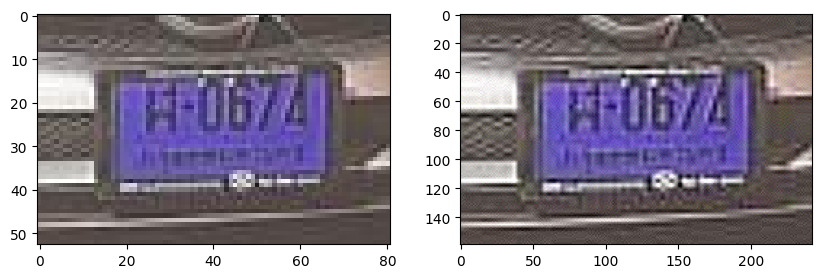

In [71]:
img = cv2.imread("/content/test/test/4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4.jpg")
id = 0
img_name = test_df.iloc[id].values[0]
print(img_name)
x1 = int(test_df.iloc[id].values[1])-10
y1 = int(test_df.iloc[id].values[2])-10
x2 = int(test_df.iloc[id].values[3])+10
y2 = int(test_df.iloc[id].values[4])+10
print(f"{img_name} {x1} {y1} {x2} {y2}")
imgcroped = img[y1:y2,x1:x2]



# Scale the image by a factor of 2 along both axes
scaled_image = cv2.resize(imgcroped, None, fx=3, fy=3)
# Remove noise using a Gaussian filter
filtered_image2 = cv2.GaussianBlur(scaled_image, (5,5), 0)
# Create the sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Sharpen the image
sharpened_image = cv2.filter2D(filtered_image2, -1, kernel)
sharpened_image = cv2.filter2D(sharpened_image, -1, kernel)

plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(imgcroped)
plt.subplot(122)
plt.imshow(sharpened_image)

results  = model(source = sharpened_image,
                     conf=0.5)   # Predict image by image
for result in results:
    if result.boxes:
        clases = [int(cls) for cls in result.boxes.cls.tolist()]    # [float] -> [int]
    print(clases)

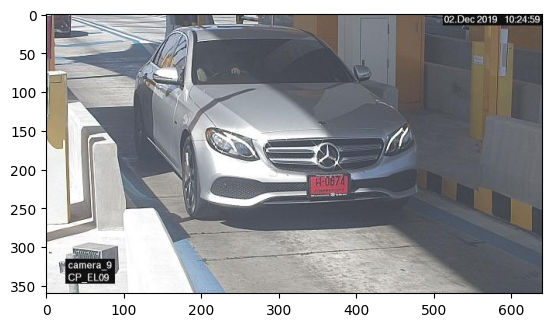

4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4
4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4 323 195 404 248

0: 448x640 1 7, 1 กรุงเทพมหานคร, 172.4ms
Speed: 1.8ms preprocess, 172.4ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
[7, 54]


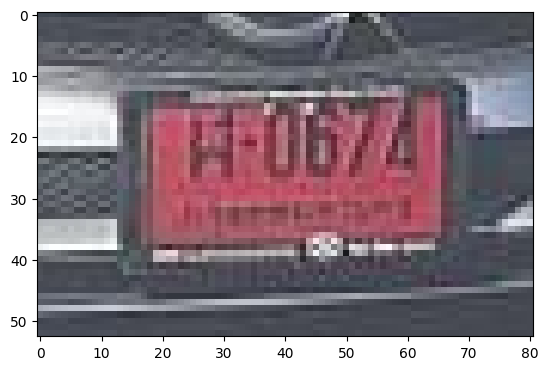

In [50]:
img = plt.imread("/content/test/test/4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4.jpg")
plt.imshow(img)
plt.show()
id = 0
img_name = test_df.iloc[id].values[0]
print(img_name)
x1 = int(test_df.iloc[id].values[1])-10
y1 = int(test_df.iloc[id].values[2])-10
x2 = int(test_df.iloc[id].values[3])+10
y2 = int(test_df.iloc[id].values[4])+10
print(f"{img_name} {x1} {y1} {x2} {y2}")
# /content/test/test/0008f18b-bbde-4cc5-92a3-b8a340484eab.jpg
# "/content/test/test/"+img_name+'.jpg'
img = plt.imread("/content/test/test/"+img_name+'.jpg')
imgcroped = img[y1:y2,x1:x2]
plt.imshow(imgcroped)
results  = model(source = imgcroped,
                     conf=0.5)   # Predict image by image
for result in results:
    if result.boxes:
        clases = [int(cls) for cls in result.boxes.cls.tolist()]    # [float] -> [int]
    print(clases)

In [51]:
img_name = test_df.iloc[2]
img_name

image_id    1b3bee82-898d-4aa8-9a7e-6f375ad62d8f
x1                                    306.425703
y1                                    204.277108
x2                                    362.248996
y2                                    227.168675
Name: 2, dtype: object

In [101]:
thaichar = {0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9'}
thai = {
 10: 'ก',
 11: 'ข',
 12: 'ฃ',
 13: 'ค',
 14: 'ฅ',
 15: 'ฆ',
 16: 'ง',
 17: 'จ',
 18: 'ฉ',
 19: 'ช',
 20: 'ซ',
 21: 'ฌ',
 22: 'ญ',
 23: 'ฎ',
 24: 'ฏ',
 25: 'ฐ',
 26: 'ฑ',
 27: 'ฒ',
 28: 'ณ',
 29: 'ด',
 30: 'ต',
 31: 'ถ',
 32: 'ท',
 33: 'ธ',
 34: 'น',
 35: 'บ',
 36: 'ป',
 37: 'ผ',
 38: 'ฝ',
 39: 'พ',
 40: 'ฟ',
 41: 'ภ',
 42: 'ม',
 43: 'ย',
 44: 'ร',
 45: 'ล',
 46: 'ว',
 47: 'ศ',
 48: 'ษ',
 49: 'ส',
 50: 'ห',
 51: 'ฬ',
 52: 'อ',
 53: 'ฮ'}
junwat = {54: 'กรุงเทพมหานคร',
 55: 'กระบี่',
 56: 'กาญจนบุรี',
 57: 'กาฬสินธุ์',
 58: 'กำแพงเพชร',
 59: 'ขอนแก่น',
 60: 'จันทบุรี',
 61: 'ฉะเชิงเทรา',
 62: 'ชลบุรี',
 63: 'ชัยนาท',
 64: 'ชัยภูมิ',
 65: 'ชุมพร',
 66: 'เชียงราย',
 67: 'เชียงใหม่',
 68: 'ตรัง',
 69: 'ตราด',
 70: 'ตาก',
 71: 'นครนายก',
 72: 'นครปฐม',
 73: 'นครพนม',
 74: 'นครราชสีมา',
 75: 'นครศรีธรรมราช',
 76: 'นครสวรรค์',
 77: 'นนทบุรี',
 78: 'นราธิวาส',
 79: 'น่าน',
 80: 'บึงกาฬ',
 81: 'บุรีรัมย์',
 82: 'ปทุมธานี',
 83: 'ประจวบคีรีขันธ์',
 84: 'ปราจีนบุรี',
 85: 'ปัตตานี',
 86: 'พระนครศรีอยุธยา',
 87: 'พังงา',
 88: 'พัทลุง',
 89: 'พิจิตร',
 90: 'พิษณุโลก',
 91: 'เพชรบุรี',
 92: 'เพชรบูรณ์',
 93: 'แพร่',
 94: 'พะเยา',
 95: 'ภูเก็ต',
 96: 'มหาสารคาม',
 97: 'มุกดาหาร',
 98: 'แม่ฮ่องสอน',
 99: 'ยะลา',
 100: 'ยโสธร',
 101: 'ร้อยเอ็ด',
 102: 'ระนอง',
 103: 'ระยอง',
 104: 'ราชบุรี',
 105: 'ลพบุรี',
 106: 'ลำปาง',
 107: 'ลำพูน',
 108: 'เลย',
 109: 'ศรีสะเกษ',
 110: 'สกลนคร',
 111: 'สงขลา',
 112: 'สตูล',
 113: 'สมุทรปราการ',
 114: 'สมุทรสงคราม',
 115: 'สมุทรสาคร',
 116: 'สระแก้ว',
 117: 'สระบุรี',
 118: 'สิงห์บุรี',
 119: 'สุโขทัย',
 120: 'สุพรรณบุรี',
 121: 'สุราษฎร์ธานี',
 122: 'สุรินทร์',
 123: 'หนองคาย',
 124: 'หนองบัวลำภู',
 125: 'อ่างทอง',
 126: 'อุดรธานี',
 127: 'อุทัยธานี',
 128: 'อุตรดิตถ์',
 129: 'อุบลราชธานี',
 130: 'อำนาจเจริญ'}
# clases = [7, 54]
def convert2label(clases):
    for i in clases:
        if i in junwat.keys():
            if i == 54:
                label = '0'
            else:
                label = '1'
        else:
            label = '1'
    for j in clases:
        if j in thai.keys():
            label = label+thai[j]
    for k in clases:
        if k in thaichar.keys():
            label = label+thaichar[k]
    return label
# convert2label(clases)

<hr>

In [96]:
df = pd.read_csv(submission_csv_path)
# df

In [ ]:
def image_w_box(pm1:str,pm2:str):
    """
    pm1 : image path str
    pm2 : yolo labels path str
    """
    # Load the image
    img = plt.imread(pm1)
    print(img.shape)
    # Path to the annotation file
    annotation_img = pm2
    # Read the YOLO annotations from the file
    with open(annotation_img, 'r') as file:
        yolo_annotations = file.readlines()
    # Plot the image
    fig, ax = plt.subplots()
    ax.imshow(img)
    # Function to convert YOLO format to bounding box coordinates
    def yolo_to_bbox(yolo_annotation, img_width, img_height):
        class_label, x_center, y_center, width, height = map(float, yolo_annotation.split())
        x_center *= img_width
        y_center *= img_height
        width *= img_width
        height *= img_height
        x_min = x_center - width / 2
        y_min = y_center - height / 2
        return x_min, y_min, width, height, int(class_label)
    # Get image dimensions
    img_height, img_width = img.shape[:2]

    # Plot each bounding box and label
    for annotation in yolo_annotations:
        x_min, y_min, width, height, class_label = yolo_to_bbox(annotation, img_width, img_height)
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min-5, y_min - 5, str(class_label), color='white', fontsize=12, backgroundcolor='red')

    plt.show()

In [88]:
# Convert xy format -> yolo format
def xy_2_yolo(row):
    # objclass = row['class_id']
    x1 = row['x1']
    y1 = row['y1']
    x2 = row['x2']
    y2 = row['y2']

    # Read the image to get its dimensions
    img_path = f"/content/images/{row['image_path']}"
    img = plt.imread(img_path)
    img_height, img_width, _ = img.shape

    # xy position -> yolo format
    x_center = (x1 + x2) / 2.0 / img_width
    y_center = (y1 + y2) / 2.0 / img_height
    width = (x2 - x1) / img_width
    height = (y2 - y1) / img_height

    # Create the YOLO formatted label
    yolo_label = f"{objclass} {x_center} {y_center} {width} {height}"
    return yolo_label

TypeError: list indices must be integers or slices, not str

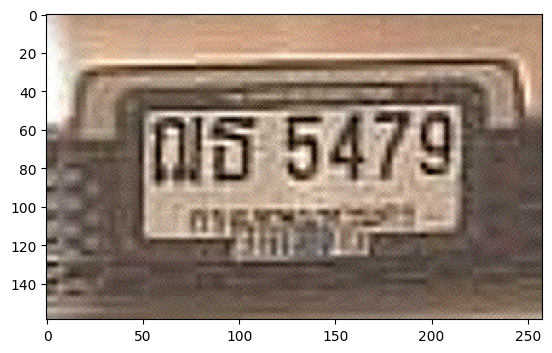

In [89]:
img = sharpened_image

fig, ax = plt.subplots()
ax.imshow(img)
# Function to convert YOLO format to bounding box coordinates
def yolo_to_bbox(yolo_annotation, img_width, img_height):
    class_label, x_center, y_center, width, height = map(float, yolo_annotation.split())
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height
    x_min = x_center - width / 2
    y_min = y_center - height / 2
    return x_min, y_min, width, height, int(class_label)
# Get image dimensions
img_height, img_width = img.shape[:2]
yolo_annotations = xy_2_yolo(boxes)
# Plot each bounding box and label
for annotation in yolo_annotations:
    x_min, y_min, width, height, class_label = yolo_to_bbox(annotation, img_width, img_height)
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(x_min-5, y_min - 5, str(class_label), color='white', fontsize=12, backgroundcolor='red')

plt.show()

In [102]:

df = pd.read_csv(submission_csv_path)


for idx,row in df.iterrows():
    # print(idx,"->",row)
    if pd.isna(row['label'])==False:        # If there are data continue kup
#         print("Continue")
          continue
    img_file = str(row['image_id'])
    id = idx
    # print(idx,img_file)
    img_path = f'{img_dir}/{img_file}.jpg'

    img = cv2.imread(img_path)
    img_name = test_df.iloc[id].values[0]      # query data
    # print(img_name)
    x1 = int(test_df.iloc[id].values[1])-10    # add bound
    y1 = int(test_df.iloc[id].values[2])-10    # add bound
    x2 = int(test_df.iloc[id].values[3])+10    # add bound
    y2 = int(test_df.iloc[id].values[4])+10    # add bound
    # print(f"{img_name} {x1} {y1} {x2} {y2}")
    imgcroped = img[y1:y2,x1:x2]
    scaled_image = cv2.resize(imgcroped, None, fx=3, fy=3)
    # Remove noise using a Gaussian filter
    filtered_image2 = cv2.GaussianBlur(scaled_image, (5,5), 0)
    # Create the sharpening kernel
    kernel = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
    # Sharpen the image
    sharpened_image = cv2.filter2D(filtered_image2, -1, kernel)
    sharpened_image = cv2.filter2D(sharpened_image, -1, kernel)
    # plt.imshow(imgcroped)
    # plt.show()
    results  = model(source = sharpened_image,
                        conf=0.5)   # Predict image by image
    for result in results:
        if result.boxes:
            boxes  = result.boxes.xyxy.tolist()    # Tensor งงๆ -> [[x1,y1,z1,a1],[x2,y2,z2,a2],...[xn,yn,zn,an]]
            clases = [int(cls) for cls in result.boxes.cls.tolist()]    # [float] -> [int]
            print(boxes)
            df.at[idx,'label'] = convert2label(clases)
        else:
            df.at[idx,'label'] = ''
    # if idx == 10:
    #     break
    # break

Streaming output truncated to the last 5000 lines.

0: 416x640 1 0, 1 2, 1 7, 1 ฆ, 1 ฐ, 1 กรุงเทพมหานคร, 19.7ms
Speed: 2.2ms preprocess, 19.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
[[49.78824996948242, 80.40066528320312, 206.13253784179688, 123.78665161132812], [48.99263381958008, 35.27130126953125, 90.57682800292969, 96.0416259765625], [79.78687286376953, 34.81744384765625, 115.29706573486328, 97.02119445800781], [117.25421905517578, 34.059974670410156, 148.80055236816406, 93.29955291748047], [139.46678161621094, 35.37223815917969, 171.66766357421875, 94.59927368164062], [161.0736846923828, 36.7969856262207, 190.45579528808594, 90.63306427001953]]

0: 416x640 3 1s, 1 6, 1 ง, 1 ร, 17.6ms
Speed: 1.6ms preprocess, 17.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
[[46.21533966064453, 37.87093734741211, 82.70606994628906, 93.66735076904297], [72.38274383544922, 36.06916046142578, 108.63126373291016, 90.29369354248047], [170.0242156982422, 

In [77]:
df

,image_id,label
0,4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4,0ฬ-0674
1,2678e665-50a9-42eb-8b98-3a1323a8950d,05กฒ4901
2,1b3bee82-898d-4aa8-9a7e-6f375ad62d8f,1กฉ9661
3,6d997bce-395e-4d25-85e4-dec70ead7954,0ห46
4,59c765b1-cdac-4fa7-902c-685f1591decf,07ฌ59ธ4
...,...,...
1695,1c766e55-3096-4814-8c23-7cb8facc0e36,014ก6ก
1696,98e8495a-e51d-494f-951d-739a93d87777,07ร667
1697,935248b8-1fe9-4cc3-8894-007bd715d309,06ก79ก20
1698,df48b54b-8e63-4484-85f1-99a6c97e92f4,045ก


In [103]:
version = "0.0.3"
# Format the time as hh:mm
formatted_time = time.strftime("%H.%M", time.localtime())
formatted_time = str(int(formatted_time.split(".")[0])+7)+formatted_time.split(".")[1]
csv_name = f'v.{version}.{formatted_time}.csv'
print(csv_name)
df.to_csv(csv_name,index=False)

v.0.0.3.700.csv


In [ ]:
# start = time.time()

# df = pd.read_csv(submission_csv_path)
# model = YOLOv10(model_path)
# # /kaggle/input/sliver/test/test/116601.jpg
# img_dir = test_img_path
# for idx,row in df.iterrows():               # idx : index, row: iloc
# #     print(idx,"->",row)
#     if pd.isna(row['Label'])==False:        # If there are data continue kup
# #         print("Continue")
#         continue
#     img_file = str(row['Image File'])
#     img_path = f'{img_dir}/{img_file}.jpg'
# #     print(img_path)
#     results  = model(source = img_path,
#                      conf=0.5)   # Predict image by image
# #     print(results)
#     for result in results:
#         if result.boxes:
#             boxes  = result.boxes.xyxy.tolist()    # Tensor งงๆ -> [[x1,y1,z1,a1],[x2,y2,z2,a2],...[xn,yn,zn,an]]
#             clases = [int(cls) for cls in result.boxes.cls.tolist()]    # [float] -> [int]
#             print(f"file : {img_file} box : {boxes} class : {clases}")
#             df.at[idx,'Annotation'] = boxes
#             df.at[idx,'Label']      = clases
#         else:
#             df.at[idx,'Annotation'] = []
#             df.at[idx,'Label']      = []
# #     if idx==5:
# #         break
# #     print()
# end   = time.time()
# print(round(end-start,5))

In [ ]:
# ปัญหา
crop ภาพได้ห่วยแตกมาก ต้อง Img แก้
class ดันไม่เรียงกัน อาจจะใช้พิกัดกรอบจาก ซไปข